# Customer Segmentation Analysis

This notebook performs a customer segmentation analysis using the RFM (Recency, Frequency, Monetary) model and compares the performance of k-means clustering with hierarchical clustering. The goal is to identify different customer segments for targeted marketing strategies.

## 1. Introduction and Data Import
In this section, I import the necessary libraries and load the customer transaction data.

First, I will load the required libraries for data manipulation, visualization, and clustering. Then, I will read the transaction and customer datasets and merge them on the `CustomerID` column to create a comprehensive dataset for analysis.



In [9]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans, AgglomerativeClustering  # For k-means and hierarchical clustering
from sklearn.metrics import silhouette_score  # For evaluating clustering performance
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # For hierarchical clustering
from sklearn.decomposition import PCA  # For PCA

# Set default plot style
plt.style.use('ggplot')

# Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Load data from CSV and Excel files for analysis
df_sales = pd.read_csv('../data/Online_Sales.csv')  # Ensure this is the correct path and file name
df_customers = pd.read_excel('../data/CustomersData.xlsx')  # Ensure this is the correct path and file name

# Merge the datasets on 'CustomerID'
df_merged = pd.merge(df_sales, df_customers, on='CustomerID', how='inner')

# Display the first few rows of the merged dataset
print(df_merged.head())

# Display the column names to verify
print(df_merged.columns)


   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   
2       17850           16681         1/1/2019  GGOEGFKQ020399   
3       17850           16682         1/1/2019  GGOEGAAB010516   
4       17850           16682         1/1/2019  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Gender Location  \
0         1     153.71               6.5          Used      M  Chicago   
1         1     

## 2. Data Preprocessing
In this step, I check for missing values, convert data types, and create a new feature called `TotalPrice` to facilitate further analysis.

Data preprocessing is a crucial step to ensure the dataset is clean and ready for analysis. Here, I will:
1. Check for missing values and duplicate values.
2. Convert necessary columns to appropriate data types.
3. Create a new feature `TotalPrice` by multiplying the quantity and unit price of each transaction.

In [11]:
# Check for missing values in the dataset
print(df_merged.isnull().sum())

# Checkin for duplicate values
print('Duplicate Values: ', df_merged.duplicated().sum())

# Convert necessary columns to appropriate data types
df_merged['Transaction_Date'] = pd.to_datetime(df_merged['Transaction_Date'])  # Convert 'Transaction_Date' to datetime format
df_merged['CustomerID'] = df_merged['CustomerID'].astype('str')  # Convert 'CustomerID' to string

# Create new feature: 'TotalPrice' as quantity * unit price
df_merged['Total_Price'] = df_merged['Quantity'] * df_merged['Avg_Price'] + df_merged['Delivery_Charges']

# Verify the first few rows of the modified dataset
df_merged.head()

# Check for any remaining missing values
print(df_merged.isnull().sum())


CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Gender                 0
Location               0
Tenure_Months          0
dtype: int64
Duplicate Values:  0
CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Gender                 0
Location               0
Tenure_Months          0
Total_Price            0
dtype: int64


## 3. Exploratory Data Analysis (EDA)
Here, I explore the data by plotting the distribution of total prices and quantities to understand the data distribution and detect any anomalies.

EDA helps to understand the underlying patterns and distributions in the dataset. I will generate descriptive statistics and visualize the distribution of total prices and quantities to identify any outliers or anomalies. Additionally, I will create plots to explore the relationships between different features.


In [13]:
# Display the first few rows of each dataframe

# Online Sales Data
print("\nOnline Sales Data:")
print(df_sales.head())

# Customers Data
print("\nCustomers Data:")
print(df_customers.head())



Online Sales Data:
   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   
2       17850           16681         1/1/2019  GGOEGFKQ020399   
3       17850           16682         1/1/2019  GGOEGAAB010516   
4       17850           16682         1/1/2019  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71        

In [14]:
df_merged.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Total_Price'],
      dtype='object')

In [15]:
df_merged.dtypes

CustomerID                     object
Transaction_ID                  int64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
Gender                         object
Location                       object
Tenure_Months                   int64
Total_Price                   float64
dtype: object

In [17]:
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Total_Price
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,160.21
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,160.21
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,8.55
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,94.15
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,23.00


In [ ]:
# Descriptive statistics for the dataset
print(df_merged.describe())

### Univariate Analysis

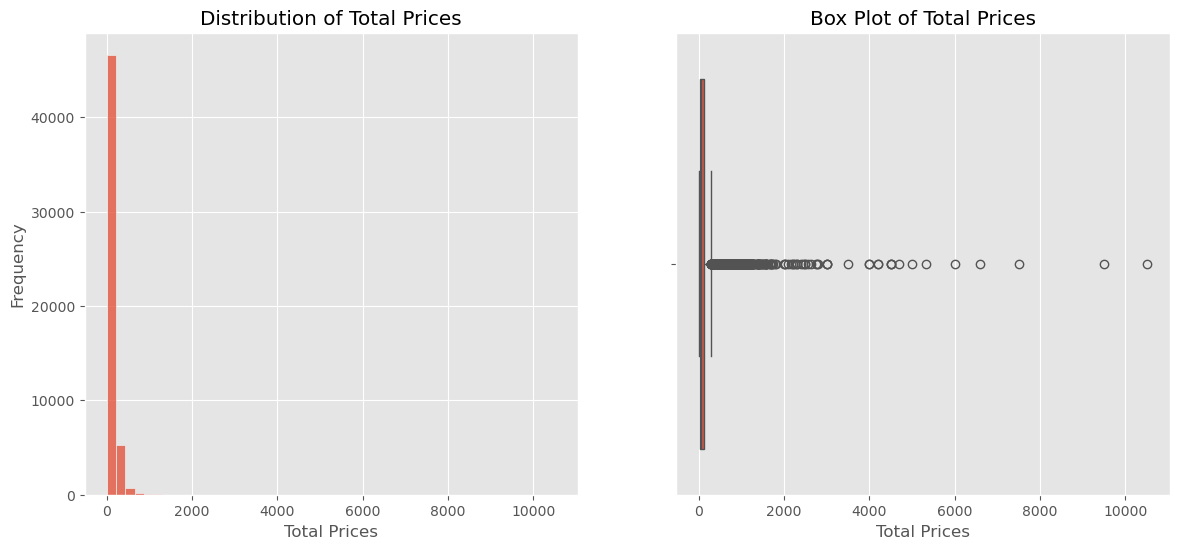

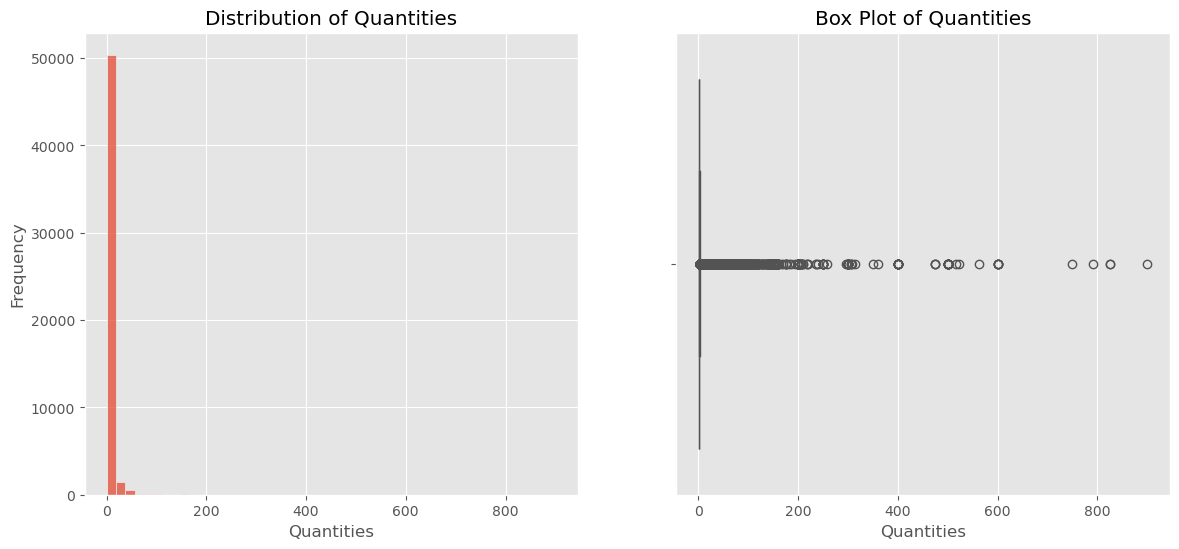

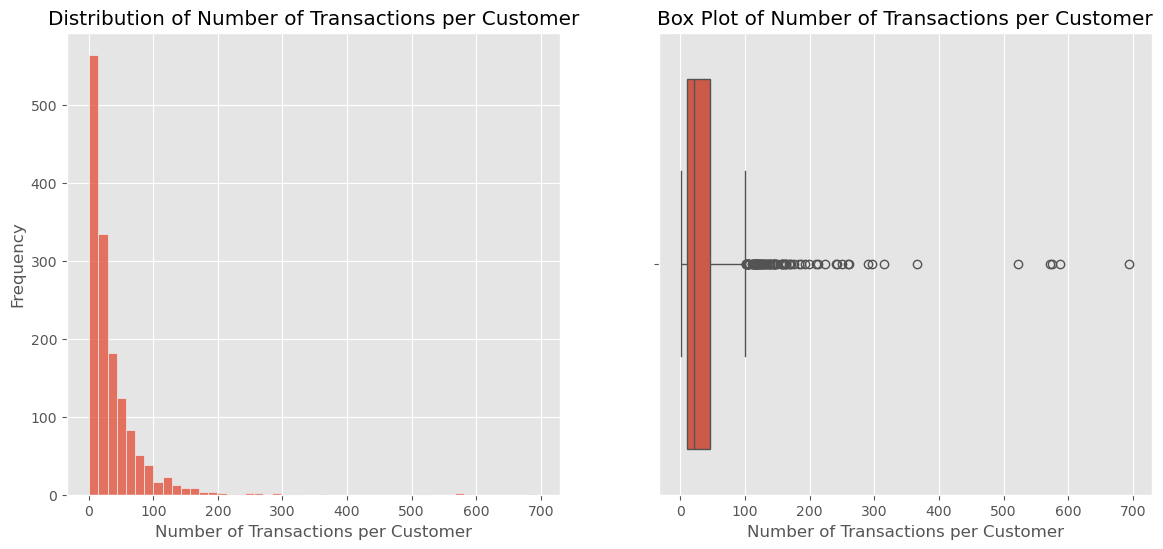

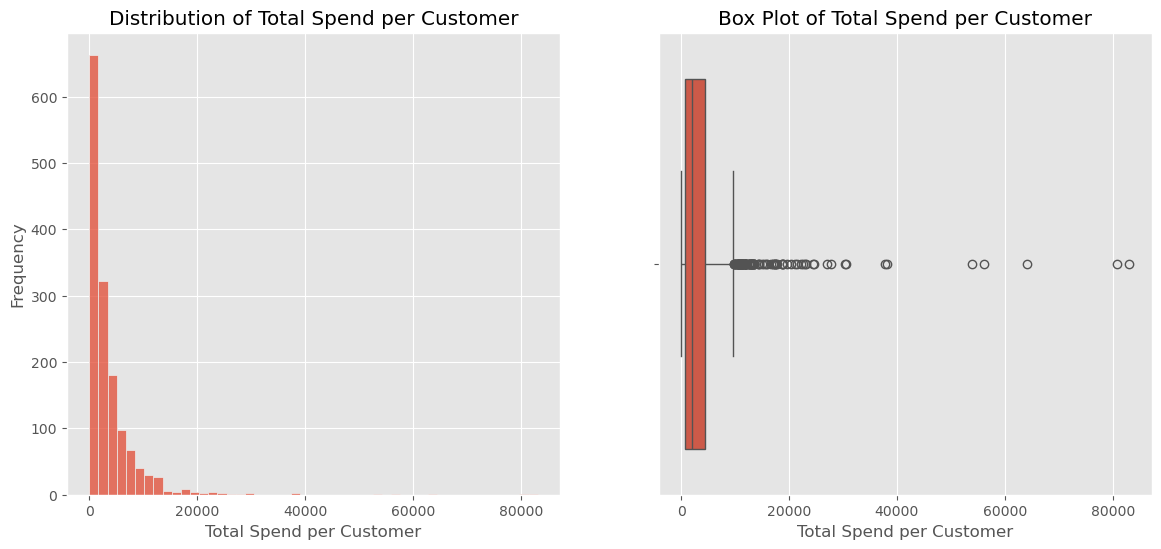

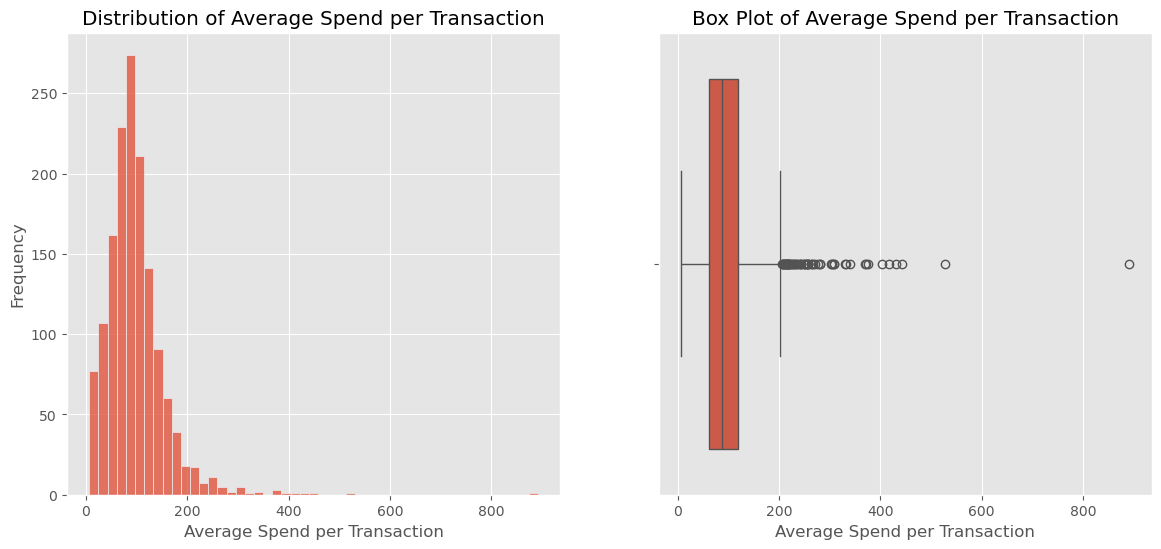

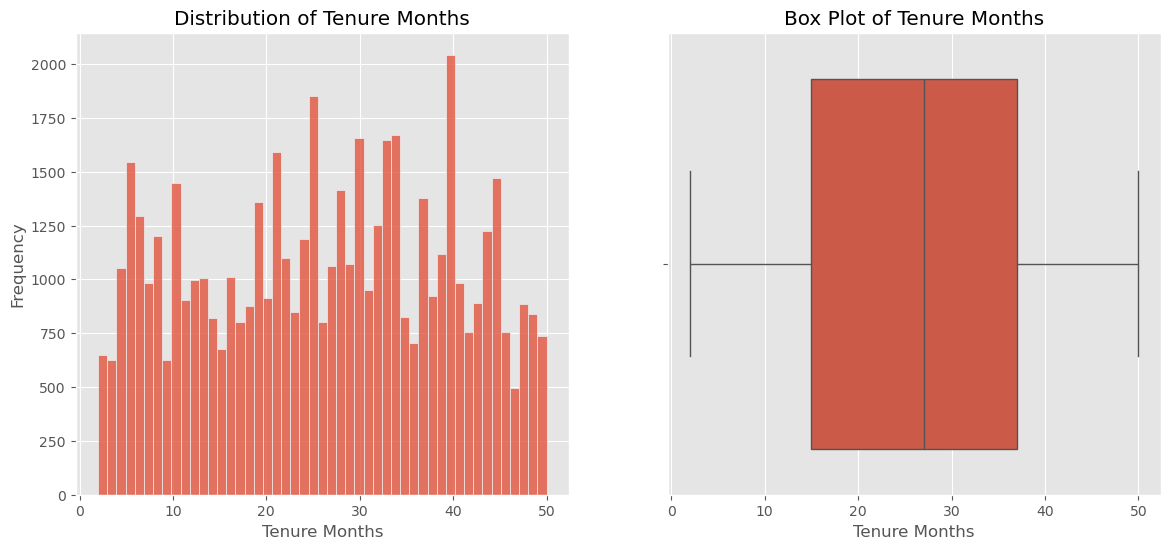

In [56]:
def plot_distribution_and_boxplot(df, column, title):
    """
    Plots the distribution and boxplot for a given column in the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column (str): The column name for which to plot the distribution and boxplot.
    title (str): The title for the plots.
    """
    plt.figure(figsize=(14, 6))  # Set the figure size

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=49)  # Plot the distribution
    plt.title(f'Distribution of {title}')  # Set the title of the plot
    plt.xlabel(title)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])  # Plot the boxplot
    plt.title(f'Box Plot of {title}')  # Set the title of the plot
    plt.xlabel(title)  # Set the x-axis label

    plt.show()  # Display the plot

# Plotting Total Price
plot_distribution_and_boxplot(df_merged, 'Total_Price', 'Total Prices')

# Plotting Quantity
plot_distribution_and_boxplot(df_merged, 'Quantity', 'Quantities')

# Plotting Number of Transactions per Customer
transactions_per_customer = df_merged.groupby('CustomerID')['Transaction_ID'].count().reset_index()
transactions_per_customer.columns = ['CustomerID', 'Number_of_Transactions']
plot_distribution_and_boxplot(transactions_per_customer, 'Number_of_Transactions', 'Number of Transactions per Customer')

# Plotting Total Spend per Customer
spend_per_customer = df_merged.groupby('CustomerID')['Total_Price'].sum().reset_index()
spend_per_customer.columns = ['CustomerID', 'Total_Spend']
plot_distribution_and_boxplot(spend_per_customer, 'Total_Spend', 'Total Spend per Customer')

# Plotting Average Spend per Transaction
avg_spend_per_transaction = df_merged.groupby('CustomerID')['Total_Price'].mean().reset_index()
avg_spend_per_transaction.columns = ['CustomerID', 'Average_Spend_per_Transaction']
plot_distribution_and_boxplot(avg_spend_per_transaction, 'Average_Spend_per_Transaction', 'Average Spend per Transaction')

plot_distribution_and_boxplot(df_merged, 'Tenure_Months', 'Tenure Months')



Histogram and Box Plot Summary:

- Skewness and Outliers: All the distributions (except for Tenure_Months) are heavily skewed towards the lower end, with many outliers in the upper range. This indicates that while most customers make small purchases or transactions, there are a few high-value customers who make large purchases.
- Customer Segmentation: The presence of outliers and skewness highlights the importance of customer segmentation. Identifying and understanding the behavior of these high-value customers could be crucial for targeted marketing strategies and personalized services.
- Data Transformation: Given the skewness, applying transformations (e.g., log transformation) to the data might help in normalizing the distributions, which can be useful for further analysis and modeling.

Tenure Months:
- The tenure of customers is distributed relatively evenly across the months, with some months showing higher frequencies.
- The median tenure is around 25 months, suggesting that half of the customers have been with the company for more than 25 months.
- Most customers have a tenure between 12 and 37 months.
- The full range of customer tenure spans from 1 to 49 months, indicating a wide range of customer loyalty durations.

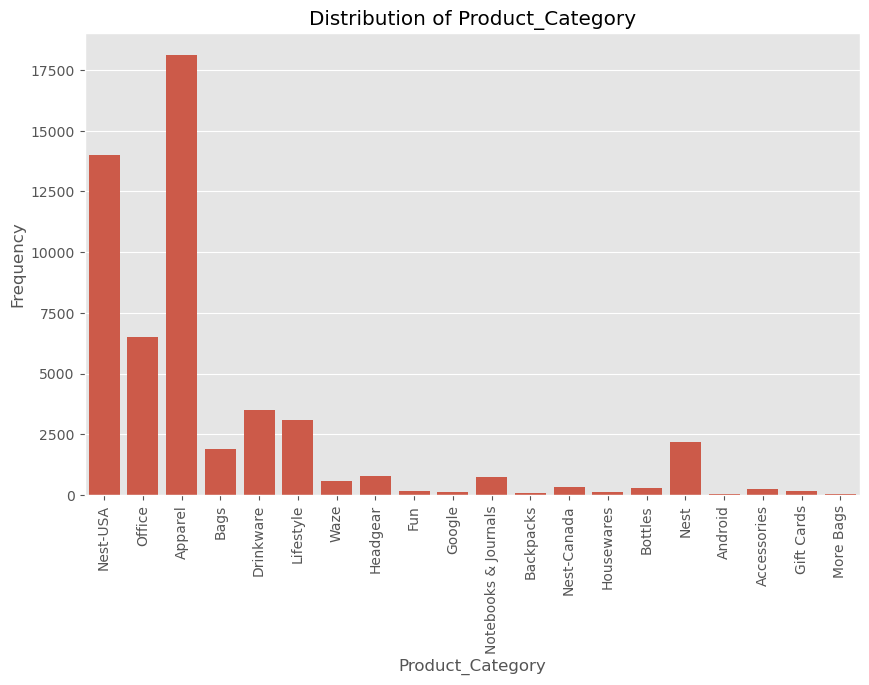

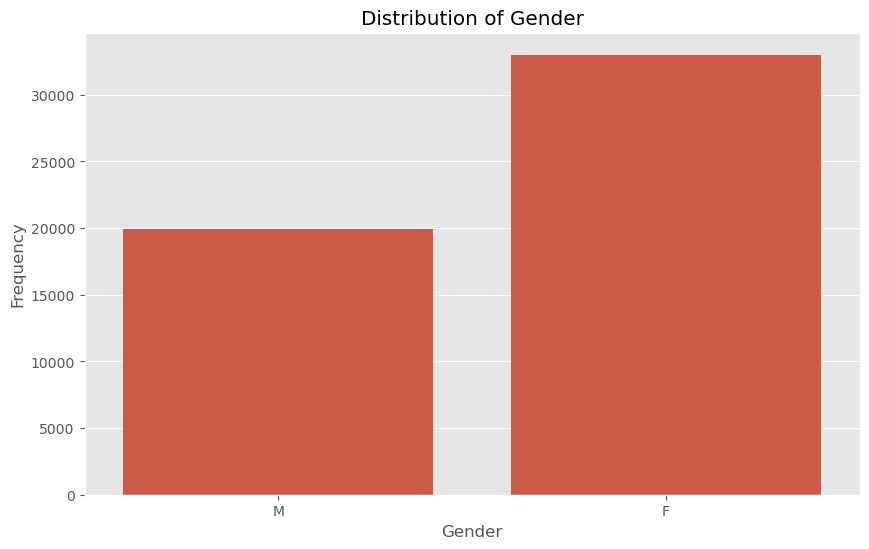

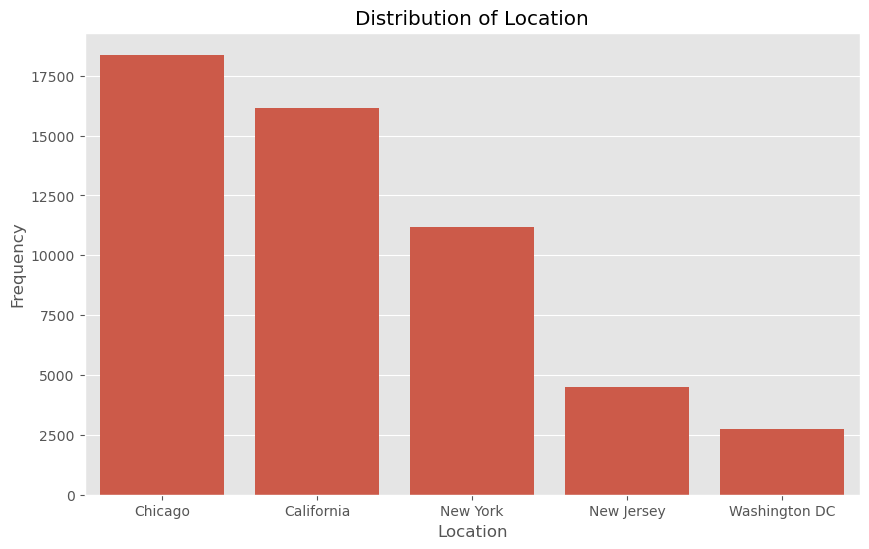

In [80]:
# Plot bar plots for categorical variables
categorical_vars = ['Product_Category', 'Gender', 'Location']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_merged, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    if var == 'Product_Category':
        plt.xticks(rotation=90)
    plt.show()



The provided plots offer insights into the distribution of product categories, gender, and location among the customers. Here's a summary of each plot:

Distribution of Product Category:

- The plot shows the frequency of different product categories purchased by customers.
    - Apparel and Nest-USA are the most frequently purchased categories, with Office also showing significant purchases.
    - Other categories like Bags, Drinkware, Lifestyle, and Bottles have moderate frequencies.
    - Categories like Notebooks & Journals, Housewares, Accessories, and others have lower purchase frequencies.
    
Distribution of Gender:

- The plot displays the distribution of gender among the customers.
    - There are more female (F) customers compared to male (M) customers.
    
Distribution of Location:

- This plot illustrates the frequency of customers from different locations.
    - Chicago has the highest number of customers, followed by California and New York.
    - New Jersey and Washington DC have relatively fewer customers.
    
These distributions can help in understanding the customer base better, guiding marketing strategies, inventory management, and improving customer segmentation efforts.


### Bivariate Analysis

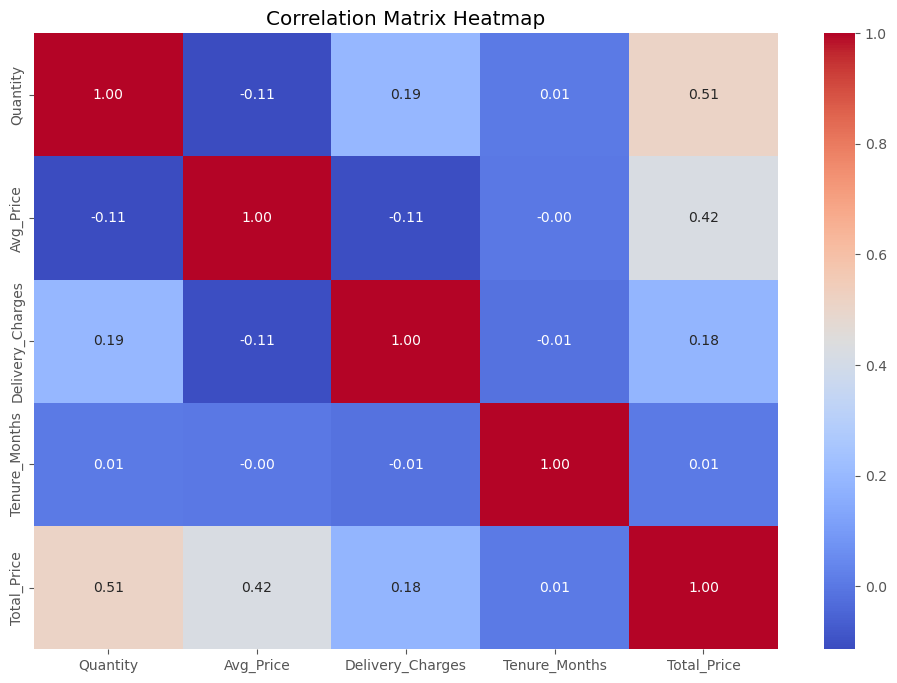

In [83]:
# Group numeric variables for correlationm matrix.
numeric = df_merged[['Quantity', 'Avg_Price', 'Delivery_Charges', 'Tenure_Months', 'Total_Price']]

# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


Correlation Analysis:

- Quantity and Total_Price: Positive Correlation: The highest positive correlation is between Quantity and Total_Price (0.49). This indicates that as the quantity increases, the total price also tends to increase.
- Avg_Price and Total_Price: Positive Correlation: There is a moderate positive correlation between Avg_Price and Total_Price (0.44). This suggests that higher average prices are associated with higher total prices.
- Quantity and Delivery_Charges: Positive Correlation: There is a weak positive correlation between Quantity and Delivery_Charges (0.19), indicating that higher quantities might be associated with higher delivery charges.
- Other Variables:
    - Weak or No Correlation: The other variables (Avg_Price, Delivery_Charges, Tenure_Months) show weak or negligible correlations with each other and with Total_Price and Quantity. This suggests that these variables do not have strong linear relationships with one another in this dataset.
    - Tenure_Months:No Significant Correlation: Tenure_Months does not show any significant correlation with the other variables, indicating that customer tenure does not have a strong linear relationship with quantity, average price, delivery charges, or total price.
    
Overall, the heatmap indicates that Quantity and Avg_Price are the most significant factors influencing Total_Price. However, since Total_Price is a function of Quantity * Avg_Price + Delivery_Charges, they should not be included in the model.  The other variables do not show strong correlations, suggesting that their impact on the total price is relatively minimal.


## 4. Feature Engineering
In this step, I create RFM (Recency, Frequency, Monetary) features for clustering analysis.

Feature engineering involves creating new features that can improve the performance of the clustering models. Here, I will create the RFM features:
- Recency: Number of days since the customer's last purchase.
- Frequency: Total number of purchases made by the customer.
- Monetary: Total amount of money spent by the customer.

I will also apply log transformation to these features to reduce skewness and standardize them for better clustering performance.


In [34]:
# Determine the maximum date in the dataset
max_date = df_merged['Transaction_Date'].max()

# Create RFM (Recency, Frequency, Monetary) features for clustering
rfm_data = df_merged.groupby('CustomerID').agg({
    'Transaction_Date': [lambda x: (max_date - x.max()).days,  # Calculate recency
                         lambda x: (max_date - x.min()).days // 30,  # Calculate tenure in months
                         'count'],  # Calculate frequency
    'Total_Price': 'sum'  # Calculate monetary value
}).reset_index()

# Flatten the MultiIndex columns
rfm_data.columns = ['CustomerID', 'Recency', 'Tenure_Months', 'Frequency', 'Monetary']

# Calculate the Average Purchase Value
rfm_data['AvgPurchaseValue'] = rfm_data['Monetary'] / rfm_data['Frequency']

# Assume a typical customer lifespan in months (e.g., 36 months for simplicity)
customer_lifespan = 36

# Calculate CLV
rfm_data['CLV'] = rfm_data['AvgPurchaseValue'] * rfm_data['Frequency'] * (rfm_data['Tenure_Months'] / customer_lifespan)

# Log transformation for better distribution
rfm_data['Recency_log'] = np.log1p(rfm_data['Recency'])  # Log transform recency
rfm_data['Frequency_log'] = np.log1p(rfm_data['Frequency'])  # Log transform frequency
rfm_data['Monetary_log'] = np.log1p(rfm_data['Monetary'])  # Log transform monetary value

# Handle any NaN or infinite values in the log-transformed data
rfm_data.replace([np.inf, -np.inf], np.nan, inplace=True)
rfm_data.fillna(0, inplace=True)

# Verify no NaN or infinite values remain after handling
print(rfm_data[['Recency_log', 'Frequency_log', 'Monetary_log']].isnull().sum())

# Standardize the RFM features along with CLV and Tenure_Months
features = ['CLV', 'Tenure_Months', 'Recency_log', 'Frequency_log', 'Monetary_log']
scaler = StandardScaler()  # Initialize the scaler
rfm_scaled = scaler.fit_transform(rfm_data[features])  # Scale the RFM features

# Verify there are no NaN values in the scaled data
print(np.isnan(rfm_scaled).sum())

# Print a sample of the processed data
print(rfm_data.head())


Recency_log      0
Frequency_log    0
Monetary_log     0
dtype: int64
0
  CustomerID  Recency  Tenure_Months  Frequency  Monetary  AvgPurchaseValue  \
0      12346      107              3          2    180.99         90.495000   
1      12347       59              9         60  14500.04        241.667333   
2      12348       73              6         23   1639.27         71.272609   
3      12350       17              0         17   1487.95         87.526471   
4      12356      107              3         36   2079.96         57.776667   

           CLV  Recency_log  Frequency_log  Monetary_log  
0    15.082500     4.682131       1.098612      5.203952  
1  3625.010000     4.094345       4.110874      9.581976  
2   273.211667     4.304065       3.178054      7.402616  
3     0.000000     2.890372       2.890372      7.305826  
4   173.330000     4.682131       3.610918      7.640585  


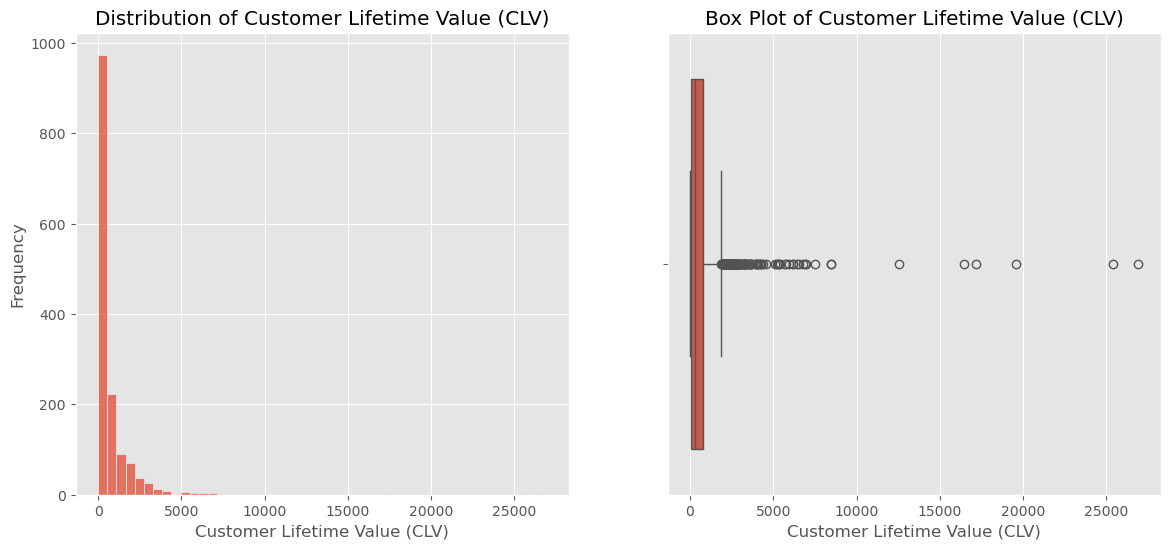

In [62]:
# Plot distribution of CLV
plot_distribution_and_boxplot(rfm_data, 'CLV', 'Customer Lifetime Value (CLV)')


**Key Insights:**
- Distribution: The majority of customers have a low CLV, with most values clustered below 1000. This indicates that a large portion of the customer base contributes relatively small amounts over their lifetime.
- Box Plot: The presence of numerous outliers suggests that there are a few customers with exceptionally high lifetime values. These outliers significantly skew the distribution.
- Customer Segmentation: The high concentration of low CLV customers and the existence of high-value outliers imply a potential for targeted strategies:
    - Retention Programs: Focus on converting more customers into high-value outliers through personalized marketing and retention programs.
    - Upselling and Cross-Selling: Implement strategies to increase the CLV of the lower-value majority through upselling and cross-selling.
    
This visualization provides a clear picture of the CLV distribution and highlights the importance of identifying and nurturing high-value customers to maximize overall customer lifetime value.

## 5. K-Means Clustering Analysis
I determine the optimal number of clusters using the elbow method and fit the k-means algorithm.

K-means clustering aims to partition the dataset into k clusters, where each data point belongs to the cluster with the nearest mean. The elbow method helps determine the optimal number of clusters by plotting the sum of squared errors (SSE) for different values of k and identifying the "elbow" point where the SSE starts to level off.  


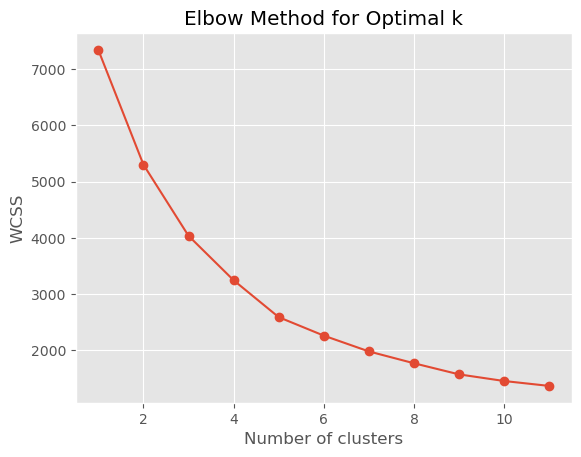

In [88]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize lists to store the metrics
silhouette_scores = []
wcss = []
davies_scores = []

# Calculate metrics for different numbers of clusters
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))
    wcss.append(kmeans.inertia_)
    davies_scores.append(davies_bouldin_score(rfm_scaled, labels))

# Include WCSS for k=1 separately for the Elbow Method
wcss.insert(0, KMeans(n_clusters=1, random_state=42).fit(rfm_scaled).inertia_)

# Plot Elbow Method
# Create subplots
fig, ax = plt.subplots()
ax.plot(range(1, 12), wcss, marker='o')
ax.set_title('Elbow Method for Optimal k')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')

plt.show()

**Determining the Optimal Number of Clusters**

The "Elbow Method for Optimal k" plot suggests that the optimal number of clusters for this dataset is around 4. This is determined by identifying the point where the WCSS curve starts to flatten, indicating that additional clusters beyond this point do not provide significant improvements in within-cluster variance. This method helps in selecting a reasonable number of clusters for clustering algorithms like K-means.  To confirm the optimal number of clusters we will use two additional scores.

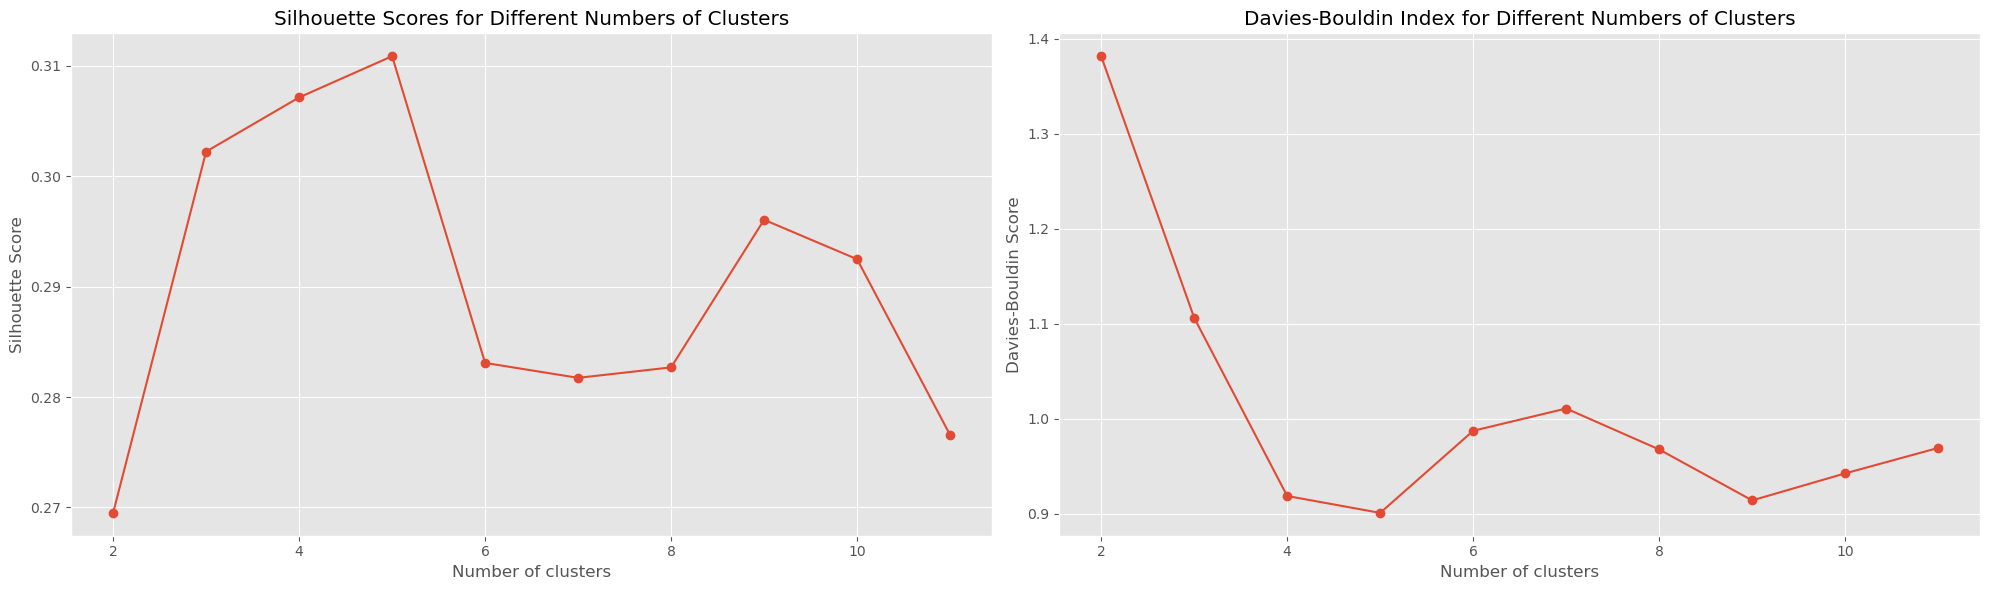

In [90]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot Silhouette Scores
axs[0].plot(range(2, 12), silhouette_scores, marker='o')
axs[0].set_title('Silhouette Scores for Different Numbers of Clusters')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Silhouette Score')

# Plot Davies-Bouldin Scores
axs[1].plot(range(2, 12), davies_scores, marker='o')
axs[1].set_title('Davies-Bouldin Index for Different Numbers of Clusters')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

**Silhouette Scores Plot**
- The Silhouette Scores plot helps us evaluate the quality of clustering by measuring how similar each point is to its own cluster compared to other clusters. The higher the silhouette score, the better the defined clusters.

**Davies-Bouldin Index Plot**
- The Davies-Bouldin Index measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering.

**Comparison**
- Best Number of Clusters:
    - Silhouette Scores: The highest silhouette score is at k=5, suggesting that k=5 provides the best-defined clusters.
    - Davies-Bouldin Index: The lowest Davies-Bouldin index is at k=5, suggesting that k=5 provides the most distinct clusters.
    
- Overall Quality:
    - k=5: Both the silhouette score and the Davies-Bouldin index indicate that k=5 is the best choice for the number of clusters, providing well-defined and distinct clusters.
    - k=4: While k=4 also shows relatively good clustering quality, it is not as optimal as k=5 based on both metrics.


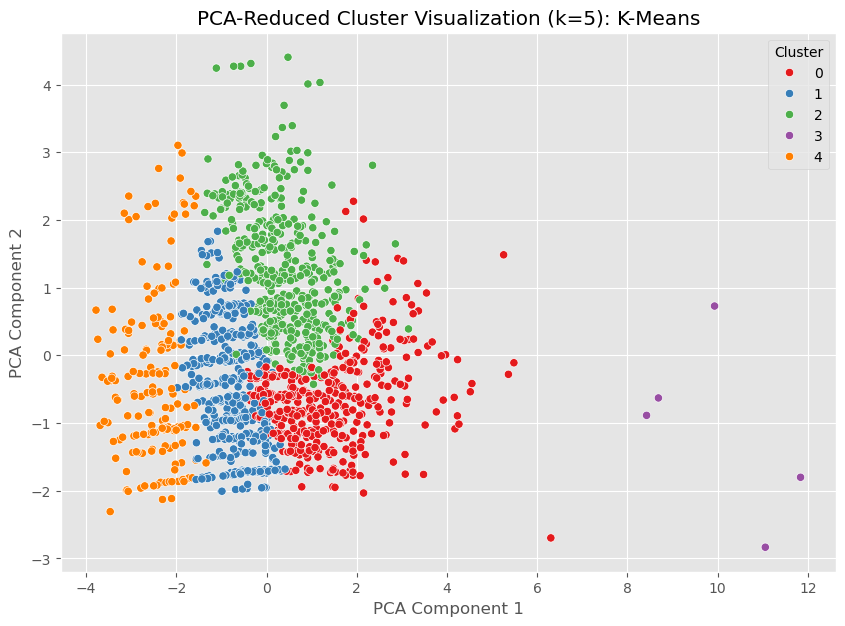

In [92]:
# Perform PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=rfm_pca, columns=['PCA1', 'PCA2'])

# Perform hierarchical clustering with 5 clusters
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
pca_df['Cluster'] = hierarchical.fit_predict(rfm_scaled)

# Plot the PCA-reduced clusters for 5 clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('PCA-Reduced Cluster Visualization (k=5): K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


Overall Insights: K-Means
- Cluster 0 and Cluster 1: Represent moderately frequent and frequent shoppers with moderate to high spending and longer tenure.
- Cluster 2: Contains less frequent shoppers with moderate spending and newer tenure.
- Cluster 3: Represents the most valuable customers with very frequent shopping, the highest spending, and the longest tenure.
- Cluster 4: Consists of the least engaged customers with infrequent shopping, the lowest spending, and the shortest tenure.

## 6. Hierarchical Clustering Analysis
I perform hierarchical clustering and determine the optimal number of clusters using the dendrogram.

Hierarchical clustering builds a tree-like structure of clusters by either merging or splitting clusters at each step. I will use the dendrogram to visualize the hierarchical clustering process and determine the optimal number of clusters. The Ward's method is used for linkage to minimize the variance within each cluster.

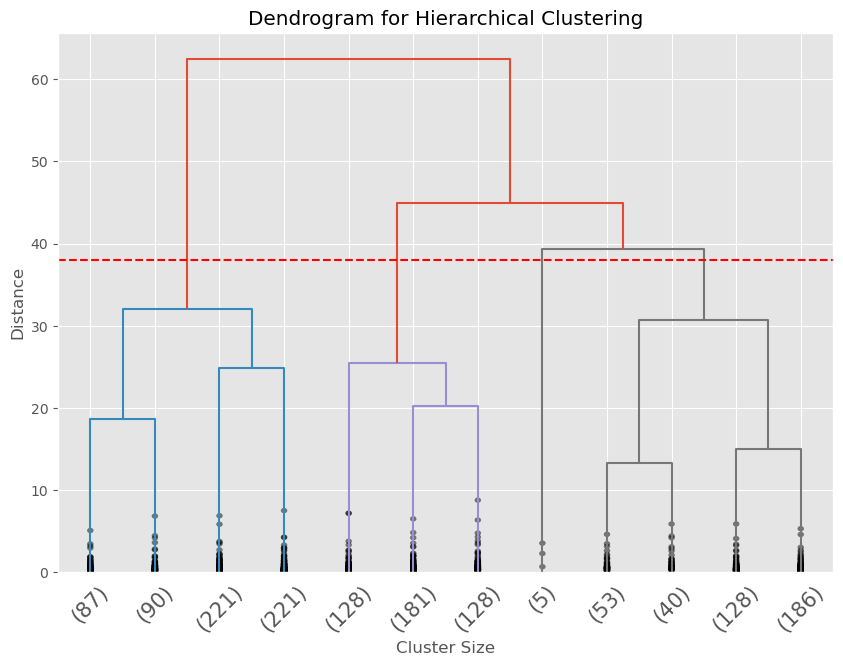

In [95]:
# Perform hierarchical clustering
linked = linkage(rfm_scaled, method='ward')  # Perform hierarchical clustering using the ward method

# Plot the dendrogram to identify the optimal number of clusters
plt.figure(figsize=(10, 7))  # Set the figure size
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')  # Set the title of the plot
plt.xlabel('Cluster Size')  # Set the x-axis label
plt.ylabel('Distance')  # Set the y-axis label

# Add a dashed line slightly below the distance level of 40
plt.axhline(y=38, color='r', linestyle='--')

plt.show()  # Display the plot

Determining the Optimal Number of Clusters:
- Elbow Method in Dendrogram: To determine the optimal number of clusters, look for the largest vertical distance that can be cut horizontally without intersecting any merges.
- In this dendrogram, a significant jump is observed around the distance levels of 40 and 60. This suggests that cutting the dendrogram at a height slightly below this level could be a good choice.
- By cutting the dendrogram slightly below 40 on the Y-axis, there are 4 vertical lines intersected by this cut. This is the optimal number of clusters.

Cluster Summary:
    Hierarchical_Cluster     Recency   Frequency      Monetary           CLV  \
0                     1  191.620355    9.460420    770.450921    154.706050   
1                     2   56.574371   39.073227   3964.292723    415.379336   
2                     3   29.200000  590.400000  67599.878000  21104.271111   
3                     4  167.909091   66.439803   6585.074349   1720.264125   

   Tenure_Months  CustomerID  
0       6.651050         619  
1       3.718535         437  
2      11.200000           5  
3       9.098280         407  


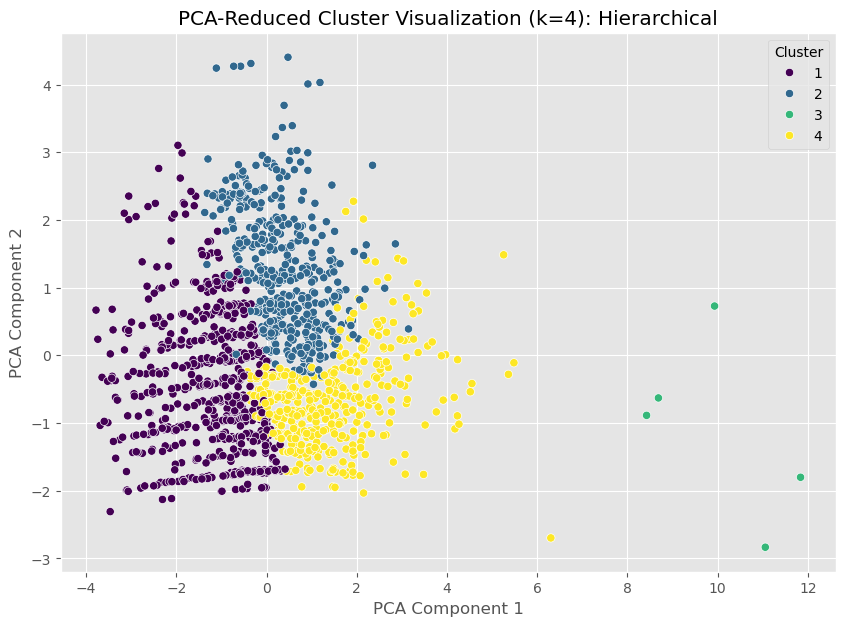

In [97]:
# Perform hierarchical clustering and specify 4 clusters
Z = linkage(rfm_scaled, method='ward')
rfm_data['Hierarchical_Cluster'] = fcluster(Z, 4, criterion='maxclust')

# Analyze cluster characteristics
cluster_summary = rfm_data.groupby('Hierarchical_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CLV': 'mean',
    'Tenure_Months': 'mean',
    'CustomerID': 'count'  # Count of customers in each cluster
}).reset_index()

print('Cluster Summary:\n', cluster_summary)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm_data['Hierarchical_Cluster']

# Plot the PCA components with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, legend='full')
plt.title('PCA-Reduced Cluster Visualization (k=4): Hierarchical')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Overall Insights: Hierarchical Clustering

- Cluster 1 and Cluster 4: High-value, frequent shoppers with long-term loyalty.
- Cluster 2: Moderately engaged customers with steady purchasing patterns.
- Cluster 3: Less engaged, potentially newer or at-risk customers with lower spending.

**Business Recommendations**

- K-Means Clustering (k=5)

    - Cluster 0 (Red):
        - Characteristics: Highly engaged, frequent shoppers, highest spending.
        - Strategies:
            - VIP Programs: Implement VIP programs with exclusive rewards and recognition to maintain their loyalty.
            - High-Value Campaigns: Target them with high-value campaigns and premium product offerings.
            
    - Cluster 1 (Blue):
        - Characteristics: Moderately frequent shoppers, moderate spending.
        - Strategies:
            - Loyalty Programs: Introduce or enhance loyalty programs to encourage more frequent purchases.
            - Personalized Discounts: Offer personalized discounts or promotions based on their shopping history to boost spending.
            
    - Cluster 2 (Green):
        - Characteristics: Central group, varied purchasing behavior with moderate frequency and spending.
        - Strategies:
            - Cross-Selling: Implement cross-selling strategies to introduce them to complementary products.
            - Targeted Promotions: Use personalized marketing campaigns to increase spending and engagement.
            
    - Cluster 3 (Purple):
        - Characteristics: Low engagement, infrequent shoppers, lower spending.
        - Strategies:
            - Reactivation Campaigns: Send reactivation campaigns with special offers to encourage them to shop more frequently.
            - Feedback Collection: Collect feedback to understand their needs better and tailor offers to their preferences.
            
    - Cluster 4 (Orange):
        - Characteristics: Frequent shoppers with significant engagement and spending.
        - Strategies:
            - Exclusive Offers: Provide early access or previews to new products to make them feel valued and special.
            - Premium Memberships: Offer premium memberships with exclusive benefits to capitalize on their high engagement.
            
- Hierarchical Clustering (k=4)

    - Cluster 1 (Dark Purple):
        - Characteristics: Highly engaged, frequent shoppers, significant spending.
        - Strategies:
            - Exclusive Events: Invite them to exclusive events or product launches to enhance engagement.
            - Top-Tier Rewards: Provide top-tier rewards for continued loyalty, such as early access to sales or special services.
            
    - Cluster 2 (Blue):
        - Characteristics: Moderately engaged, steady purchasing patterns.
        - Strategies:
            - Subscription Services: Offer subscription services for regular purchases to increase convenience and loyalty.
            - Cross-Selling: Implement cross-selling strategies to introduce them to complementary products.
            
    - Cluster 3 (Green):
        - Characteristics: Less engaged, infrequent shoppers, lower spending.
        - Strategies:
            - Win-Back Campaigns: Launch win-back campaigns with strong incentives to re-engage these customers.
            - Targeted Promotions: Use targeted promotions based on past purchase behavior to drive re-engagement.
            
    - Cluster 4 (Yellow):
        - Characteristics: Highly engaged, frequent shoppers, high spending.
        - Strategies:
            - Premium Product Lines: Introduce premium product lines or exclusive collections to this high-value segment.
            - Personalized Communication: Enhance personalized communication to make them feel valued and understood.

Summary

By accurately mapping the clusters to their respective colors and characteristics, tailored marketing strategies can be developed for each customer segment. This ensures that each segment receives personalized and relevant offers, enhancing customer satisfaction, increasing engagement, and driving revenue growth.








